# Ford GoBike System Data Investigation
## by Zyad Alatar

## Investigation Overview

In this presentation we are going to investigation ford GoBike system dataset with showing comparisons and relationship between set of attributes 

## Dataset Overview

The dataset contains 16 columns and more than 18000 of rows about trips using ford GoBike

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('201902-fordgobike-tripdata.csv')

In [4]:
df.shape

(183412, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

## Data cleaning

In [6]:
#Now we have removed all rows that birth of year on it is null
df=df[df['member_birth_year'].isnull() == False]

#now we have removed all rows that doesn't have start station name
df=df[df['start_station_name'].isnull() == False]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [7]:
#changing the data type of start and end time to be datetime
df.start_time=pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

## Gender Distribution
Gender and number of trips are a qestionable.Which gender has the highest number of trips ?

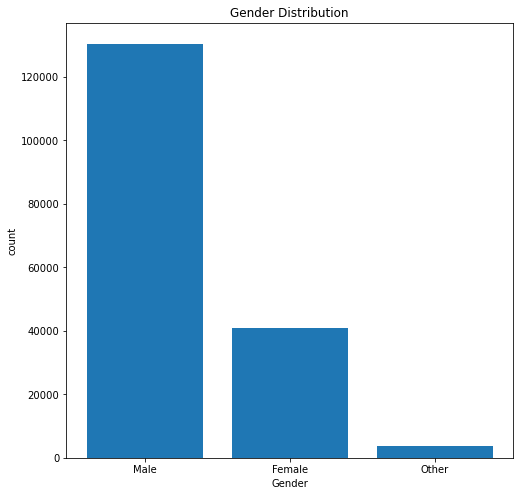

In [8]:
#First of all we will show gender distribution
plt.figure(figsize=[8,8])
plt.bar(x = df.member_gender.value_counts().keys(), height = df.member_gender.value_counts() )
plt.xlabel('Gender')
plt.ylabel('count')
plt.title('Gender Distribution')
plt;

it is clear that there is huge difference between Male users to Female, as obvious Male are more with around 130000 users

## Distance occurence
What is The most occured distance?

In [15]:
#now i will calculate the distance using the spatial data that we have in our dataset
#I refered to stackOverFlow to get a function that calculate the distance based on latitude&longitude
#https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude
from math import sin, cos, sqrt, atan2, radians

def distance (lat1,lon1,lat2,lon2):
    R = 6373.0
    
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return np.float64(round(1000*distance))

In [16]:
#Now we will add new colume that conations the distance
#note that the distance here im meters
df['distance'] = df.apply(lambda row: distance(row['start_station_latitude'],row['start_station_longitude'],row['end_station_latitude'],row['end_station_longitude']),axis=1)
#confirming
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,545.0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2705.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,261.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2410.0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,3333.0


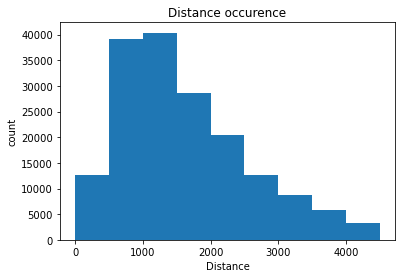

In [17]:
plt.hist(data = df, x ='distance', bins = np.arange(0, (2133+ 1.5*1247)+500, 500));
plt.title('Distance occurence')
plt.xlabel('Distance')
plt.ylabel('count')
plt;

from the histogram its obvious the range between 500 to 1500 meters a lot of people travel

## Users Distribution
What kind of users uses more ?


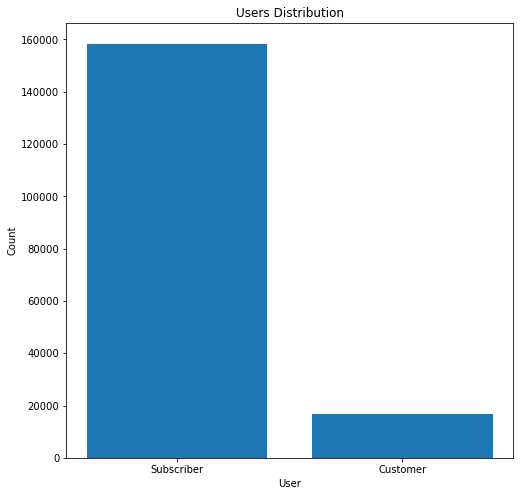

In [18]:
plt.figure(figsize=[8,8])
plt.bar(x = df.user_type.value_counts().keys(), height = df.user_type.value_counts())
plt.title('Users Distribution')
plt.xlabel('User')
plt.ylabel('Count')
plt;

it is clear that there is huge difference between Subscriber users to Customer, as obvious Male are more with around 160000 users

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!